In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pyod.models.ecod import ECOD
from pyod.models.lunar import LUNAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [2]:
peng = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\pen-global-unsupervised-ad.csv', header = None)

In [3]:
peng

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47.0,100.0,27.0,81.0,57.0,37.0,26.0,0.0,0.0,23.0,56.0,53.0,100.0,90.0,40.0,98.0,n
1,0.0,89.0,27.0,100.0,42.0,75.0,29.0,45.0,15.0,15.0,37.0,0.0,69.0,2.0,100.0,6.0,o
2,0.0,57.0,31.0,68.0,72.0,90.0,100.0,100.0,76.0,75.0,50.0,51.0,28.0,25.0,16.0,0.0,o
3,0.0,100.0,7.0,92.0,5.0,68.0,19.0,45.0,86.0,34.0,100.0,45.0,74.0,23.0,67.0,0.0,o
4,0.0,67.0,49.0,83.0,100.0,100.0,81.0,80.0,60.0,60.0,40.0,40.0,33.0,20.0,47.0,0.0,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,57.0,89.0,0.0,100.0,1.0,68.0,43.0,34.0,30.0,0.0,1.0,31.0,41.0,65.0,100.0,86.0,n
805,20.0,77.0,61.0,100.0,100.0,80.0,48.0,46.0,9.0,7.0,68.0,0.0,25.0,39.0,0.0,82.0,n
806,84.0,90.0,0.0,91.0,51.0,56.0,98.0,19.0,36.0,0.0,43.0,40.0,100.0,75.0,62.0,100.0,n
807,42.0,99.0,55.0,61.0,71.0,24.0,18.0,0.0,0.0,30.0,64.0,61.0,100.0,94.0,9.0,100.0,n


In [4]:
shuffled_df = peng.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.184241,1.075690,-0.692205,0.279015,-1.539382,0.179075,-0.825337,0.444909,1.014918,1.101821,1.495952,0.472617,0.341158,-1.201297,0.382313,-2.613058
1,-0.184241,0.631126,0.177520,-0.836265,-0.461541,-1.120224,-1.618248,-0.964875,-0.942536,0.863193,0.301998,1.254438,1.168116,1.135628,-0.422592,0.889308
2,-0.730803,1.075690,-1.453214,-0.205889,-0.036078,-0.026077,1.685549,0.042113,1.346690,-0.998111,0.274232,-0.420892,-0.003407,-0.017255,-0.734168,-0.075629
3,-1.309516,1.075690,-0.837159,-0.399851,0.531207,-0.607343,1.685549,-0.964875,-0.942536,-0.473128,-0.530993,0.435388,0.892463,0.481289,-1.123638,0.782093
4,1.487597,1.075690,-0.329820,0.860900,-0.177899,0.179075,0.760486,-0.192850,-0.710295,-0.998111,-1.280685,-0.234744,-0.658082,-0.048414,1.472828,0.674878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,-0.023487,0.575556,-1.272022,0.327505,-1.539382,-0.402190,-0.891413,-0.964875,-0.975713,0.147307,0.107633,0.919372,1.168116,0.917515,0.044772,0.960785
805,-1.438119,-1.091557,1.264676,-2.145506,0.502843,-1.872449,-1.618248,-0.729911,0.152312,0.958644,1.495952,1.328897,0.444528,1.135628,-0.760132,0.067324
806,1.519747,-0.035719,0.829813,1.006371,-0.830276,0.726148,0.991752,1.317632,2.076589,1.960884,1.412653,-0.495351,-0.416886,-1.980272,-1.123638,-2.041243
807,0.555226,0.908978,-0.112389,-1.224188,0.077379,-1.872449,-1.618248,-0.830610,-0.245815,1.197273,1.495952,1.105520,0.616811,1.135628,-0.812062,0.746355


In [6]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,16
0,1
1,0
2,0
3,0
4,0
...,...
804,0
805,0
806,1
807,0


ECOD

In [8]:
ecod = ECOD()
ecod.fit(df)

ECOD(contamination=0.1, n_jobs=1)

In [9]:
ecod_score = ecod.decision_function(df)

In [10]:
ecod_score

array([22.54831508, 23.50896167, 23.89362467, 31.71177537, 23.41521254,
       29.47914434, 18.95726837, 25.75962806, 22.1598087 , 19.4847326 ,
       29.31974315, 21.05430059, 23.1148366 , 22.89453994, 20.03164758,
       22.35455489, 25.89964112, 21.76815459, 26.2779786 , 19.32732015,
       23.29377319, 22.53176021, 26.84745237, 20.93253585, 28.68740708,
       22.43272336, 22.01382536, 17.77935662, 22.81222311, 21.04769406,
       18.14851605, 19.55484558, 31.78070788, 20.20915423, 20.33844662,
       31.74923241, 18.28364312, 26.18272349, 21.97077341, 23.25404508,
       21.09723545, 19.95141394, 22.49718151, 21.00860529, 33.70754617,
       23.07286318, 22.03787754, 20.34207072, 24.37553061, 27.41066035,
       24.7316001 , 19.7247652 , 19.59562034, 25.3973763 , 17.71352233,
       17.42330963, 28.01537359, 28.27941837, 22.94005164, 17.65861113,
       19.80524066, 18.43084221, 18.02852423, 21.28333855, 33.57685847,
       18.31426807, 21.30758297, 27.02177964, 32.64953574, 18.59

In [11]:
ecod_pred = ecod.predict(df)
ecod_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [12]:
ecod_acc = accuracy_score(y, ecod_pred)
ecod_acc

0.8504326328800988

0.765863081440272


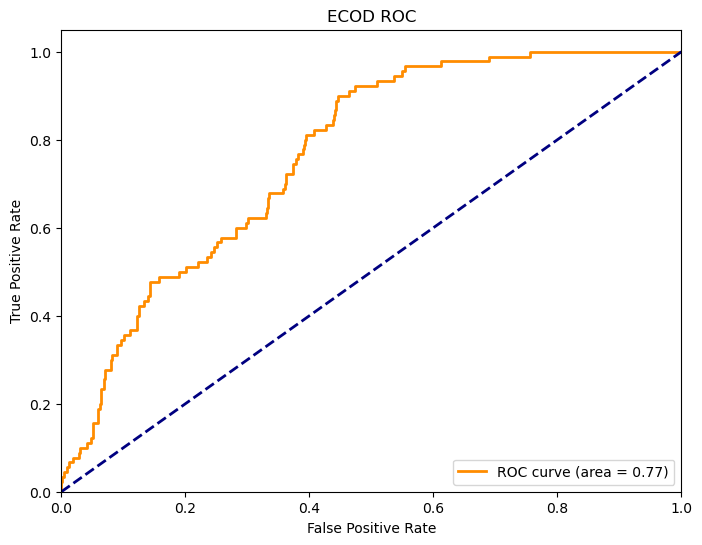

In [13]:
ecod_fpr, ecod_tpr, ecod_thresholds = roc_curve(y, ecod_score)
roc_auc = auc(ecod_fpr, ecod_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ecod_fpr, ecod_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ECOD ROC')
plt.legend(loc='lower right')
plt.show()

LUNAR

In [14]:
lunar = LUNAR()
lunar.fit(df)

LUNAR(contamination=0.1, epsilon=0.1, lr=0.001, model_type='WEIGHT',
   n_epochs=200, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
   scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

In [15]:
lunar_score = lunar.decision_function(df)
lunar_score

array([-2.05846071e-01, -5.76685488e-01, -2.15875149e-01,  4.53638315e-01,
       -2.63685942e-01, -2.24246979e-01, -7.16029048e-01, -6.92429125e-01,
       -4.50716019e-01, -6.46131992e-01,  4.96300817e-01, -5.00102639e-01,
       -4.81324792e-01, -8.01818728e-01, -4.99121547e-01, -3.81111383e-01,
       -7.16764987e-01, -1.03662848e-01, -4.39622521e-01, -6.38919890e-01,
       -4.04769897e-01, -4.08318639e-01,  3.41627836e-01, -5.70401192e-01,
       -1.85439348e-01, -6.34775758e-01, -6.44297361e-01, -5.38045049e-01,
       -4.09016132e-01, -7.48358369e-01, -6.40901804e-01, -5.96160173e-01,
       -6.90892756e-01, -5.61593294e-01, -3.17753911e-01, -6.62090123e-01,
       -7.77406216e-01, -1.85895681e-01, -4.79099274e-01, -2.84829021e-01,
       -3.35084081e-01, -2.54733205e-01, -1.64375305e-02, -4.82389331e-01,
       -6.20114326e-01, -3.77776146e-01, -1.07117653e-01, -1.46475792e-01,
       -3.09567451e-02, -1.10618949e-01, -4.16313410e-01, -9.06054497e-01,
       -5.01471519e-01, -

In [16]:
lunar_pred = lunar.predict(df)
lunar_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
lunar_acc = accuracy_score(y,lunar_pred)
lunar_acc

0.9196538936959209

0.8906815020862309


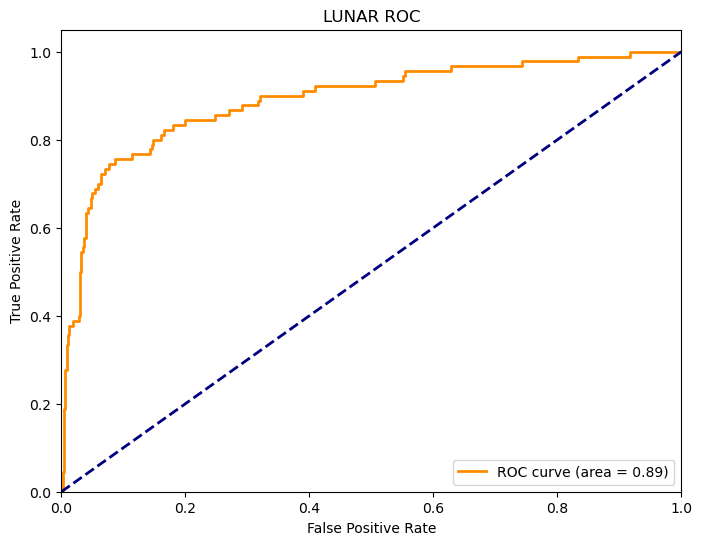

In [18]:
lunar_fpr, lunar_tpr, lunar_thresholds = roc_curve(y, lunar_score)
roc_auc = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lunar_fpr, lunar_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LUNAR ROC')
plt.legend(loc='lower right')
plt.show()

In [19]:
y_array = y.values.ravel()

score_df = pd.DataFrame({'lunar_score': lunar_score, 'ecod_score': ecod_score, 'y': y_array})
score_df

,lunar_score,ecod_score,y
0,-0.205846,22.548315,1
1,-0.576685,23.508962,0
2,-0.215875,23.893625,0
3,0.453638,31.711775,1
4,-0.263686,23.415213,0
...,...,...,...
804,0.560821,24.599369,1
805,-0.304742,30.631567,0
806,0.088924,27.073490,0
807,-0.452729,29.939336,0


In [20]:
x = score_df[['lunar_score', 'ecod_score']]
y = score_df['y']

In [21]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [23]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9383


In [24]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9134
Test set score: 0.9383


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cv_scores = cross_val_score(logreg, x, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores)}')


Cross-Validation Scores: [0.93209877 0.87654321 0.92592593 0.93209877 0.91304348]
Average Cross-Validation Score: 0.9159420289855073


0.9019162416937103


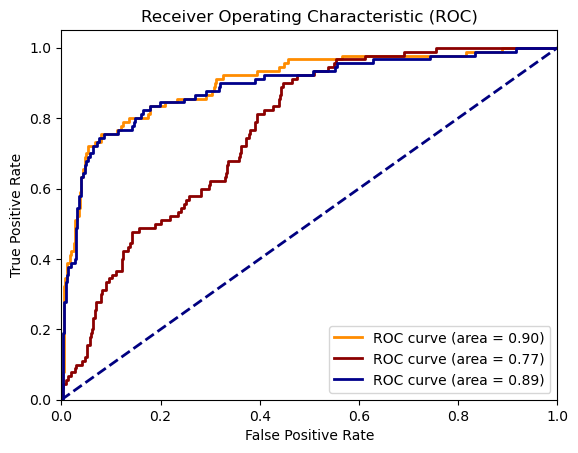

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get predicted probabilities for the test set
y_prob = logreg.predict_proba(x)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc_ecod = auc(ecod_fpr, ecod_tpr)
roc_auc_lunar = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(ecod_fpr, ecod_tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ecod)
plt.plot(lunar_fpr, lunar_tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lunar)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [7]:
lunar_accuracies = []
ecod_accuracies = []
ensemble_accuracies = []
lunar_auc = []
ecod_auc = []
ensemble_auc = []

for i in range (10):
  lunar = LUNAR()
  lunar.fit(df)
  lunar_pred = lunar.predict(df)
  lunar_scores = lunar.decision_function(df)
  lunar_scores1 = lunar.decision_scores_
  lunar_acc = accuracy_score(y,lunar_pred)
  lunar_auc_scores = roc_auc_score(y, lunar_scores1)
  ecod = ECOD()
  ecod.fit(df)
  ecod_pred = ecod.predict(df)
  ecod_scores1 = ecod.decision_function(df)
  ecod_scores = ecod.decision_function(df)
  ecod_acc = accuracy_score(y,ecod_pred)
  ecod_auc_scores = roc_auc_score(y, ecod_scores1)

  y_array = y.values.ravel()

  score_df = pd.DataFrame({'lunar_score': lunar_scores, 'ecod_score': ecod_scores, 'y': y_array})
  score_df

  x = score_df[['lunar_score', 'ecod_score']]
  y = score_df['y']
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  logreg = LogisticRegression(solver='liblinear', random_state=0)
  logreg.fit(x_train, y_train)
  y_pred_test = logreg.predict(x_test)
  
  ensemble_acc = accuracy_score(y_test,y_pred_test)
  y_prob = logreg.predict_proba(x)[:, 1]
  fpr, tpr, thresholds = roc_curve(y, y_prob)
  ensemble_auc_scores = auc(fpr, tpr)
  
  lunar_accuracies.append(lunar_acc)
  ecod_accuracies.append(ecod_acc)
  ensemble_accuracies.append(ensemble_acc)
  lunar_auc.append(lunar_auc_scores)
  ecod_auc.append(ecod_auc_scores)
  ensemble_auc.append(ensemble_auc_scores)


avg_lunar_acc = np.mean(lunar_accuracies)
avg_ecod_acc = np.mean(ecod_accuracies)
avg_ensemble_acc = np.mean(ensemble_accuracies)

avg_lunar_auc = np.mean(lunar_auc)
avg_ecod_auc = np.mean(ecod_auc)
avg_ensemble_auc = np.mean(ensemble_auc)


print(avg_lunar_acc,avg_ecod_acc,avg_ensemble_acc)

print(avg_lunar_auc,avg_ecod_auc,avg_ensemble_auc)

  

0.9102595797280593 0.8504326328800988 0.9296296296296298
0.8634971410910215 0.765863081440272 0.8741183742852728
